# In this notebook I will take the do time lagged correlation for 0, 50, 100, 150, 200, 250, and 300 meters depth

In [1]:
pip install --upgrade dask distributed


Note: you may need to restart the kernel to use updated packages.


In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import numpy as np
import xesmf as xe
from   scipy.interpolate import griddata
import dask as dsk

import hvplot.xarray
import hvplot.pandas

from   cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.PlateCarree()

from scipy import stats
from scipy.stats import t


In [ ]:
# Change to section I want:

In [9]:
twenty5 = xr.open_mfdataset("/nobackup/users/ommeren/ECEarth/25_sec_avg_corr.nc")
twenty5

<xarray.Dataset>
Dimensions:  (lev: 38, lon: 170, lag: 23)
Coordinates:
  * lev      (lev) float64 1.556 2.668 3.856 5.14 ... 333.9 370.7 411.8 457.6
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
    lat      float64 ...
  * lag      (lag) int64 -3 -2 -1 0 1 2 3 4 5 6 ... 11 12 13 14 15 16 17 18 19
Data variables:
    thetao   (lag, lev, lon) float64 dask.array<chunksize=(23, 38, 170), meta=np.ndarray>

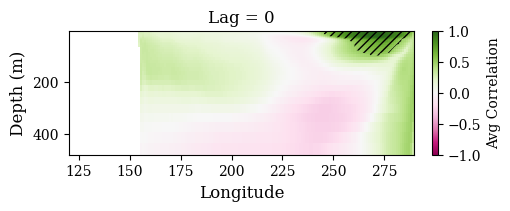

In [10]:

#I load my data into memorie first because of Dask:
equator = twenty5.load()

# Define the lags to analyze (including 0)
lags = [0]  # Ensure Lag 0 is included

# Create a figure
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Ensure axes is iterable for single-lag cases
if len(lags) == 1:
    axes = [axes]

for i, lag in enumerate(lags):
    ax = axes[i]

    # Select correlation values for Lag 0
    lag_corr = twenty5.sel(lag=lag)

    # Compute t-statistic
    n_runs = 16  # Number of model runs
    df = n_runs - 1  # Degrees of freedom

    t_stat = lag_corr * np.sqrt(df) / np.sqrt(1 - lag_corr**2)

    # Compute p-values
    p_values = xr.apply_ufunc(
        stats.t.sf, np.abs(t_stat), df,
        kwargs={"loc": 0, "scale": 1}
    ) * 2  # Two-tailed test

    # Significance threshold
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot correlation coefficients
    lag_corr["thetao"].plot(
        cbar_kwargs={'label': 'Avg Correlation'},
        vmin=-1.0, vmax=1.0,
        cmap="PiYG",
        ax=ax
    )

    # Overlay significance with hatching
    significance_mask["thetao"].where(significance_mask["thetao"]).plot.contourf(
        levels=[-1, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    ax.invert_yaxis()
    # Customize plot
    ax.set_title(f"Lag = {lag}", fontsize=12)
    ax.set_xlabel("Longitude", fontsize=12)
    ax.set_ylabel("Depth (m)", fontsize=12)

    # Adjust colorbar appearance
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(10)
    colorbar.ax.tick_params(labelsize=10)


# Show the plot
plt.show()

fig.savefig('EC_corr_lag_0_eq.png', dpi=300, bbox_inches='tight')  # Save with 300 dpi for quality

In [7]:
two70 = xr.open_mfdataset("/nobackup/users/ommeren/ECEarth/270_sec_avg_corr.nc")
two70

<xarray.Dataset>
Dimensions:  (lev: 38, lat: 180, lag: 23)
Coordinates:
  * lev      (lev) float64 1.556 2.668 3.856 5.14 ... 333.9 370.7 411.8 457.6
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    lon      float64 ...
  * lag      (lag) int64 -3 -2 -1 0 1 2 3 4 5 6 ... 11 12 13 14 15 16 17 18 19
Data variables:
    thetao   (lag, lev, lat) float64 dask.array<chunksize=(23, 38, 180), meta=np.ndarray>

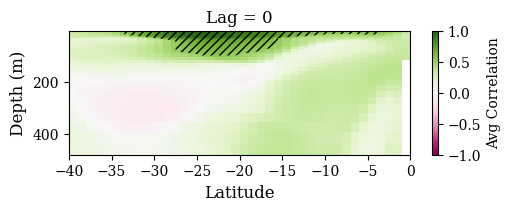

In [12]:
#I load my data into memorie first because of Dask:
two70 = two70.load()

# Define the lags to analyze (including 0)
lags = [0]  # Ensure Lag 0 is included

# Create a figure
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Ensure axes is iterable for single-lag cases
if len(lags) == 1:
    axes = [axes]

for i, lag in enumerate(lags):
    ax = axes[i]

    # Select correlation values for Lag 0
    lag_corr = two70.sel(lag=lag).sel(lat=slice(-40,0))

    # Compute t-statistic
    n_runs = 16  # Number of model runs
    df = n_runs - 1  # Degrees of freedom

    t_stat = lag_corr * np.sqrt(df) / np.sqrt(1 - lag_corr**2)

    # Compute p-values
    p_values = xr.apply_ufunc(
        stats.t.sf, np.abs(t_stat), df,
        kwargs={"loc": 0, "scale": 1}
    ) * 2  # Two-tailed test

    # Significance threshold
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot correlation coefficients
    lag_corr["thetao"].plot(
        cbar_kwargs={'label': 'Avg Correlation'},
        vmin=-1.0, vmax=1.0,
        cmap="PiYG",
        ax=ax
    )

    # Overlay significance with hatching
    significance_mask["thetao"].where(significance_mask["thetao"]).plot.contourf(
        levels=[-1, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    ax.invert_yaxis()
    # Customize plot
    ax.set_title(f"Lag = {lag}", fontsize=12)
    ax.set_xlabel("Latitude", fontsize=12)
    ax.set_ylabel("Depth (m)", fontsize=12)

    # Adjust colorbar appearance
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(10)
    colorbar.ax.tick_params(labelsize=10)


# Show the plot
plt.show()

fig.savefig('EC_corr_lag_0_270.png', dpi=300, bbox_inches='tight')  # Save with 300 dpi for quality 


In [23]:
surface = xr.open_mfdataset("/nobackup/users/ommeren/ECEarth/+lag0_0m_average_Corr_thetao.nc")
surface

<xarray.Dataset>
Dimensions:  (lat: 50, lon: 170, lag: 23)
Coordinates:
    lev      float64 ...
  * lat      (lat) float64 -39.5 -38.5 -37.5 -36.5 -35.5 ... 5.5 6.5 7.5 8.5 9.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * lag      (lag) int64 -3 -2 -1 0 1 2 3 4 5 6 ... 11 12 13 14 15 16 17 18 19
Data variables:
    thetao   (lag, lat, lon) float64 dask.array<chunksize=(23, 50, 170), meta=np.ndarray>

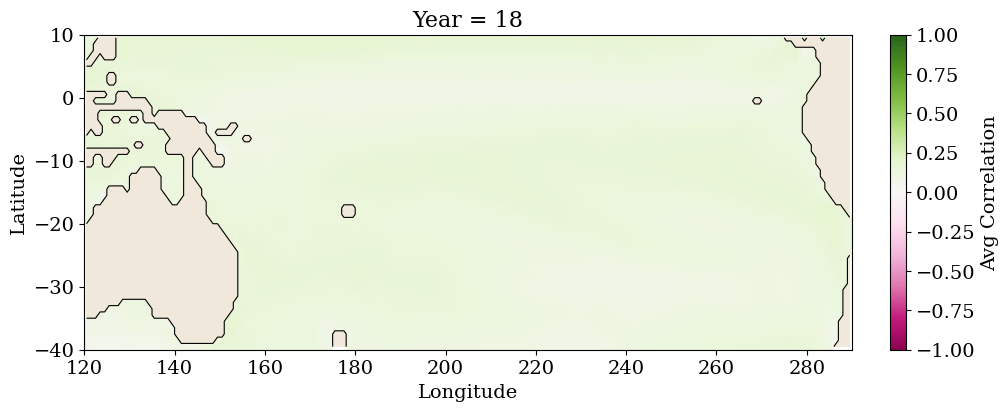

In [27]:
# Font
plt.rcParams['font.family'] = 'serif'

# Load data into memory
surface = surface.load()

# Define the lags to analyze
lags = range(18, 19)  # Lags 0 to 2

# Create a larger figure
fig, axes = plt.subplots(len(lags), 1, figsize=(10, 4 * len(lags)), constrained_layout=True)

# Ensure axes is iterable for single-lag case
if len(lags) == 1:
    axes = [axes]

for i, lag in enumerate(lags):
    ax = axes[i]

    # Select lagged correlation
    lag_corr = surface.sel(lag=lag)

    # Compute t-statistic
    n_runs = 16
    df = n_runs - 1
    t_stat = lag_corr * np.sqrt(df) / np.sqrt(1 - lag_corr**2)

    # Compute p-values
    p_values = xr.apply_ufunc(
        stats.t.sf, np.abs(t_stat), df,
        kwargs={"loc": 0, "scale": 1}
    ) * 2

    significance_mask = p_values < 0.05

    # Plot correlation
    corr_plot = lag_corr["thetao"].plot(
        cbar_kwargs={'label': 'Avg Correlation'},
        vmin=-1.0, vmax=1.0,
        cmap="PiYG",
        ax=ax
    )

    # Add landmass overlay (NaNs = continents)
    land_mask = np.isnan(lag_corr["thetao"])
    land_mask.plot.contourf(
        ax=ax,
        levels=[0.5, 1],
        colors=["#D2B48C"],
        alpha=0.3,
        add_colorbar=False,
        zorder=0
    )
    land_mask.plot.contour(
        ax=ax,
        levels=[0.5],
        colors="black",
        linewidths=0.8,
        zorder=1
    )

    # Overlay significance with hatching
    significance_mask["thetao"].where(significance_mask["thetao"]).plot.contourf(
        levels=[-1, 1],
        colors="none",
        hatches=["////"],
        add_colorbar=False,
        ax=ax,
        zorder=2
    )

    # Customize axis labels and ticks
    ax.set_title(f"Year = {lag}", fontsize=16)
    ax.set_xlabel("Longitude", fontsize=14)
    ax.set_ylabel("Latitude", fontsize=14)
    ax.tick_params(labelsize=14)

    # Colorbar label and tick size
    colorbar = corr_plot.colorbar
    colorbar.ax.yaxis.label.set_size(14)
    colorbar.ax.tick_params(labelsize=14)

# Show and save
plt.show()
fig.savefig('EC_corr_lag_18_0m_with_continents.png', dpi=300, bbox_inches='tight')


In [28]:
five0 = xr.open_mfdataset("/nobackup/users/ommeren/ECEarth/+lag0_50m_average_Corr_thetao.nc")
five0

<xarray.Dataset>
Dimensions:  (lat: 50, lon: 170, lag: 23)
Coordinates:
  * lat      (lat) float64 -39.5 -38.5 -37.5 -36.5 -35.5 ... 5.5 6.5 7.5 8.5 9.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * lag      (lag) int64 -3 -2 -1 0 1 2 3 4 5 6 ... 11 12 13 14 15 16 17 18 19
Data variables:
    thetao   (lag, lat, lon) float64 dask.array<chunksize=(23, 50, 170), meta=np.ndarray>

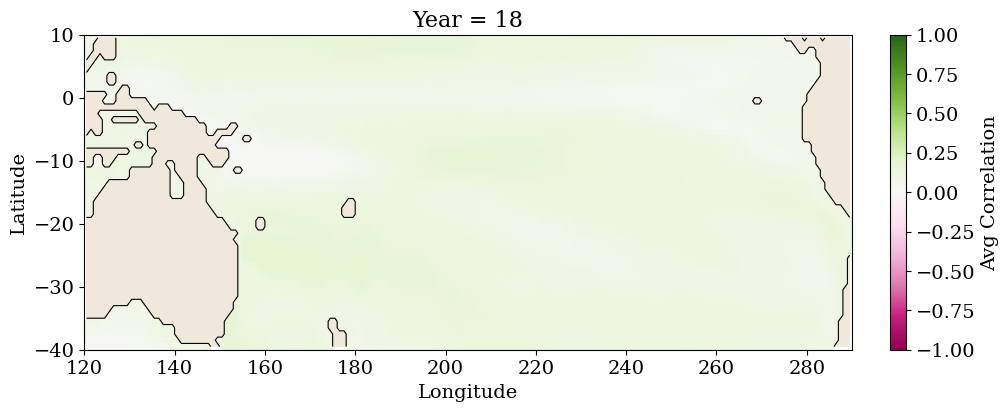

In [30]:
# Font
plt.rcParams['font.family'] = 'serif'

# Load data into memory
five0 = five0.load()

# Define the lags to analyze
lags = range(18, 19)

# Create a larger figure
fig, axes = plt.subplots(len(lags), 1, figsize=(10, 4 * len(lags)), constrained_layout=True)

# Ensure axes is iterable
if len(lags) == 1:
    axes = [axes]

for i, lag in enumerate(lags):
    ax = axes[i]

    # Select correlation values for the given lag
    lag_corr = five0.sel(lag=lag)

    # Compute t-statistic and p-values
    n_runs = 16
    df = n_runs - 1
    t_stat = lag_corr * np.sqrt(df) / np.sqrt(1 - lag_corr**2)

    p_values = xr.apply_ufunc(
        stats.t.sf, np.abs(t_stat), df,
        kwargs={"loc": 0, "scale": 1}
    ) * 2

    significance_mask = p_values < 0.05

    # Plot correlation map
    corr_plot = lag_corr["thetao"].plot(
        cbar_kwargs={'label': 'Avg Correlation'},
        vmin=-1.0, vmax=1.0,
        cmap="PiYG",
        ax=ax
    )

    # Add landmasses using NaNs
    land_mask = np.isnan(lag_corr["thetao"])
    land_mask.plot.contourf(
        ax=ax,
        levels=[0.5, 1],
        colors=["#D2B48C"],  # Tan fill
        alpha=0.3,
        add_colorbar=False,
        zorder=0
    )
    land_mask.plot.contour(
        ax=ax,
        levels=[0.5],
        colors="black",
        linewidths=0.8,
        zorder=1
    )

    # Overlay significance hatching
    significance_mask["thetao"].where(significance_mask["thetao"]).plot.contourf(
        levels=[-1, 1],
        colors="none",
        hatches=["////"],
        add_colorbar=False,
        ax=ax,
        zorder=2
    )

    # Format axes and ticks
    ax.set_title(f"Year = {lag}", fontsize=16)
    ax.set_xlabel("Longitude", fontsize=14)
    ax.set_ylabel("Latitude", fontsize=14)
    ax.tick_params(labelsize=14)

    # Adjust colorbar font size
    colorbar = corr_plot.colorbar
    colorbar.ax.yaxis.label.set_size(14)
    colorbar.ax.tick_params(labelsize=14)

# Show and save the plot
plt.show()
fig.savefig('EC_corr_lag_18_50m_with_continents.png', dpi=300, bbox_inches='tight')


In [13]:
one50m = xr.open_mfdataset("/nobackup/users/ommeren/ECEarth/+lag0_150m_average_Corr_thetao.nc")
one50m

<xarray.Dataset>
Dimensions:  (lat: 50, lon: 170, lag: 23)
Coordinates:
  * lat      (lat) float64 -39.5 -38.5 -37.5 -36.5 -35.5 ... 5.5 6.5 7.5 8.5 9.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * lag      (lag) int64 -3 -2 -1 0 1 2 3 4 5 6 ... 11 12 13 14 15 16 17 18 19
Data variables:
    thetao   (lag, lat, lon) float64 dask.array<chunksize=(23, 50, 170), meta=np.ndarray>

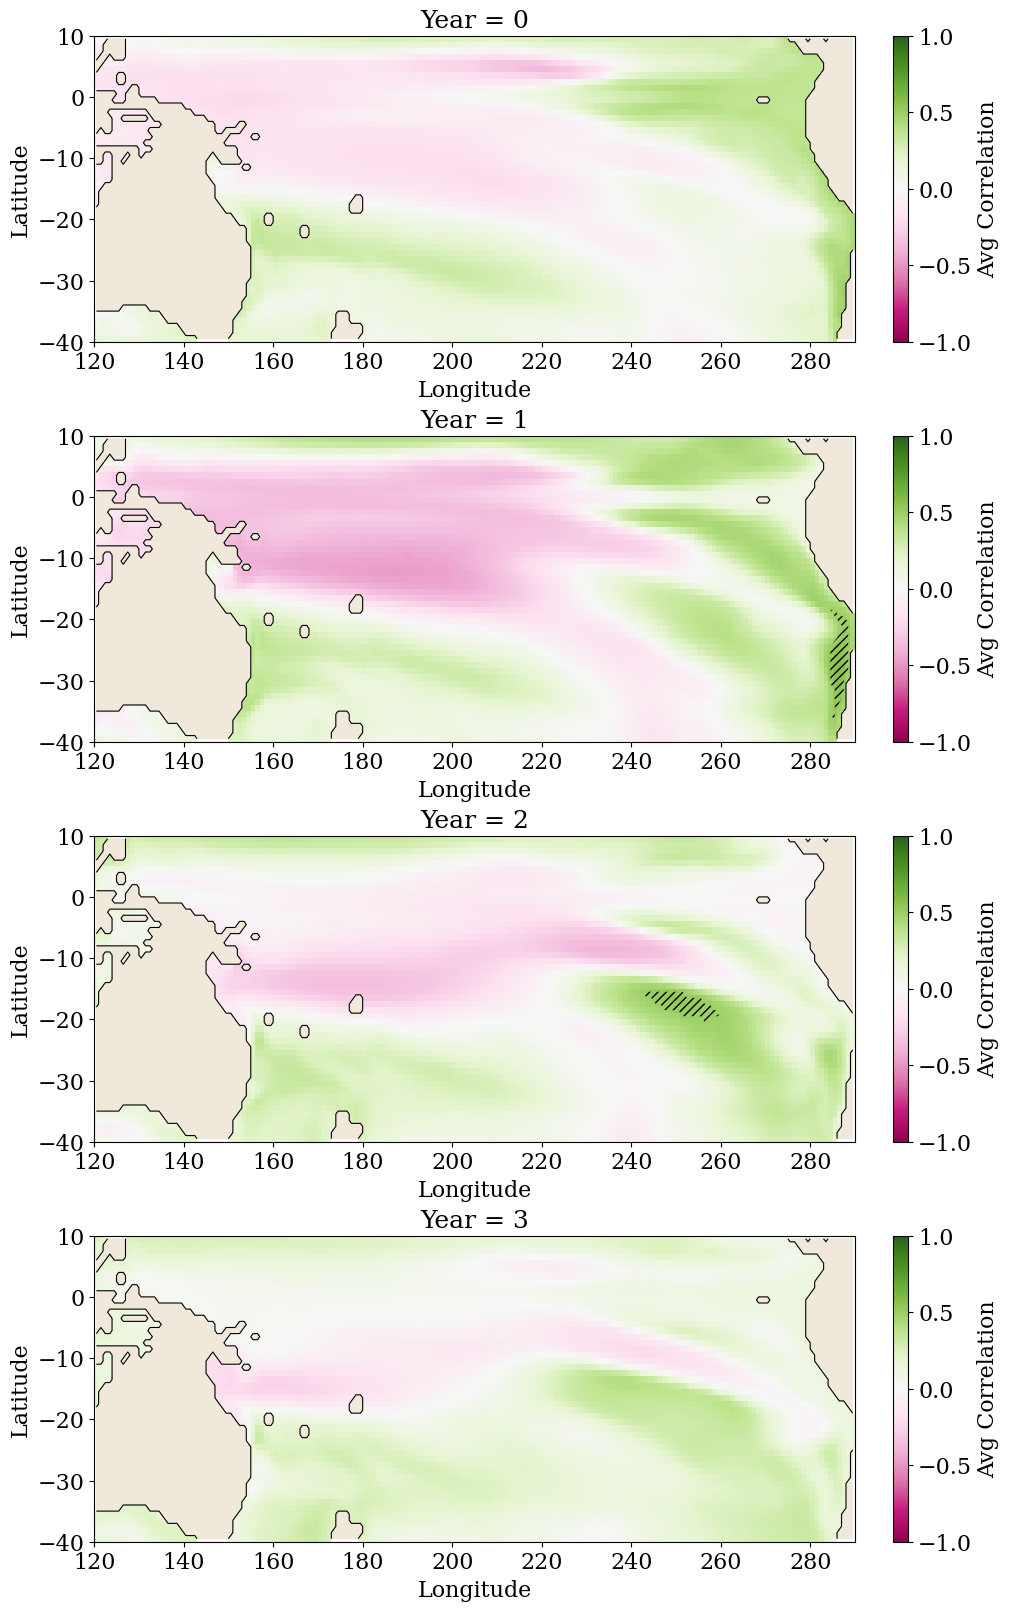

In [14]:
# Font
plt.rcParams['font.family'] = 'serif'

# Load data into memory
one50m = one50m.load()

# Define the lags to analyze
lags = range(0, 4)

# Create figure with larger size
fig, axes = plt.subplots(len(lags), 1, figsize=(10, 4 * len(lags)), constrained_layout=True)

# Ensure axes is iterable for single-lag cases
if len(lags) == 1:
    axes = [axes]

for i, lag in enumerate(lags):
    ax = axes[i]

    # Select correlation values for the current lag
    lag_corr = one50m.sel(lag=lag)

    # T-statistic and p-values
    n_runs = 16
    df = n_runs - 1
    t_stat = lag_corr * np.sqrt(df) / np.sqrt(1 - lag_corr**2)

    p_values = xr.apply_ufunc(
        stats.t.sf, np.abs(t_stat), df,
        kwargs={"loc": 0, "scale": 1}
    ) * 2

    significance_mask = p_values < 0.05

    # Plot correlation coefficients
    corr_plot = lag_corr["thetao"].plot(
        cbar_kwargs={'label': 'Avg Correlation'},
        vmin=-1.0, vmax=1.0,
        cmap="PiYG",
        ax=ax
    )

    # Add continent overlay (land mask from NaNs)
    land_mask = np.isnan(lag_corr["thetao"])
    land_mask.plot.contourf(
        ax=ax,
        levels=[0.5, 1],
        colors=["#D2B48C"],  # Tan fill
        alpha=0.3,
        add_colorbar=False,
        zorder=0
    )
    land_mask.plot.contour(
        ax=ax,
        levels=[0.5],
        colors="black",
        linewidths=0.8,
        zorder=1
    )

    # Overlay significance hatching
    significance_mask["thetao"].where(significance_mask["thetao"]).plot.contourf(
        levels=[-1, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax, zorder=2
    )

    # Customize labels and ticks
    ax.set_title(f"Year = {lag}", fontsize=18)
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)
    ax.tick_params(labelsize=16)

    # Colorbar font sizes
    colorbar = corr_plot.colorbar
    colorbar.ax.yaxis.label.set_size(16)
    colorbar.ax.tick_params(labelsize=16)

# Show and save figure
plt.show()
fig.savefig('EC_corr_lag_0_150m_with_continents.png', dpi=300, bbox_inches='tight')


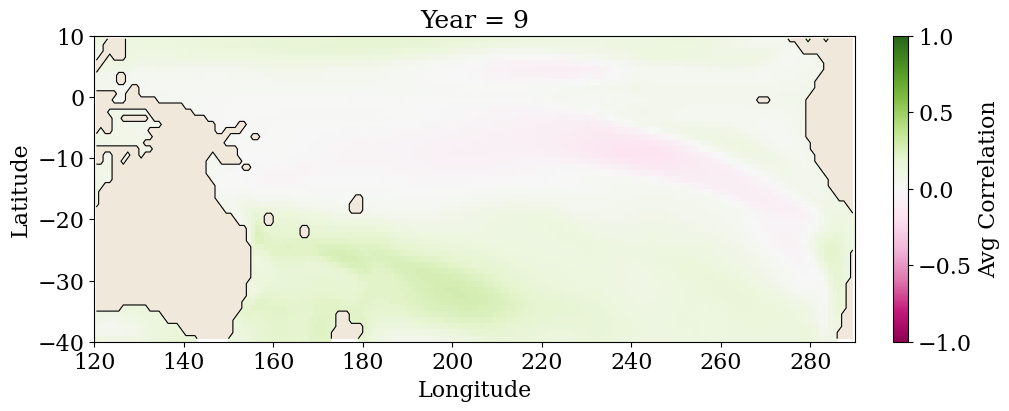

In [20]:
# Font
plt.rcParams['font.family'] = 'serif'

# Load your data into memory
one50m = one50m.load()

# Define lags
lags = range(9, 10)

# Create figure and subplots
fig, axes = plt.subplots(len(lags), 1, figsize=(10, 4 * len(lags)), constrained_layout=True)
if len(lags) == 1:
    axes = [axes]

n_runs = 16
df = n_runs - 1

for i, lag in enumerate(lags):
    ax = axes[i]
    
    lag_corr = one50m.sel(lag=lag)
    t_stat = lag_corr * np.sqrt(df) / np.sqrt(1 - lag_corr**2)

    # p-values (two-tailed)
    p_values = xr.apply_ufunc(
        stats.t.sf, np.abs(t_stat), df,
        kwargs={"loc": 0, "scale": 1}
    ) * 2
    significance_mask = p_values < 0.05

    # Plot the main correlation map
    corr_plot = lag_corr["thetao"].plot(
        ax=ax,
        cmap="PiYG",
        vmin=-1.0, vmax=1.0,
        cbar_kwargs={'label': 'Avg Correlation'}
    )

    # Overlay land mask (semi-transparent brown)
    land_mask = np.isnan(lag_corr["thetao"])
    land_mask.plot.contourf(
        ax=ax,
        levels=[0.5, 1],  # mask = True
        colors=["#D2B48C"],
        alpha=0.3,  # Semi-transparent
        add_colorbar=False,
        zorder=0  # Behind data
    )

    # 2. Black outline around land areas
    land_mask.plot.contour(
        ax=ax,
        levels=[0.5],        # One contour level
        colors="black",      # Black edge
        linewidths=0.8,      # Thin but visible
        zorder=1

    )
    # Overlay significance hatching
    significance_mask["thetao"].where(significance_mask["thetao"]).plot.contourf(
        ax=ax,
        levels=[-1, 1],
        colors="none",
        hatches=["////"],
        add_colorbar=False,
        zorder=2
    )

    # Axis formatting
    ax.set_title(f"Year = {lag}", fontsize=18)
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)
    ax.tick_params(labelsize=16)

    # Colorbar formatting
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(16)
    colorbar.ax.tick_params(labelsize=16)

# Show and save
plt.show()
fig.savefig('EC_corr_lag_0_150m_with_transparent_landmask.png', dpi=300, bbox_inches='tight')





In [15]:
one00m = xr.open_mfdataset("/nobackup/users/ommeren/ECEarth/+lag0_100m_average_Corr_thetao.nc")
one00m

<xarray.Dataset>
Dimensions:  (lat: 50, lon: 170, lag: 23)
Coordinates:
  * lat      (lat) float64 -39.5 -38.5 -37.5 -36.5 -35.5 ... 5.5 6.5 7.5 8.5 9.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * lag      (lag) int64 -3 -2 -1 0 1 2 3 4 5 6 ... 11 12 13 14 15 16 17 18 19
Data variables:
    thetao   (lag, lat, lon) float64 dask.array<chunksize=(23, 50, 170), meta=np.ndarray>

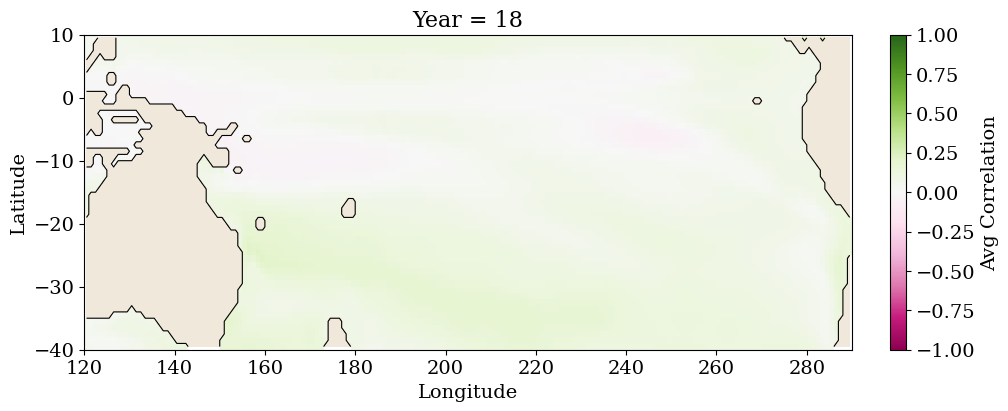

In [19]:
# Font
plt.rcParams['font.family'] = 'serif'

# Load data into memory
one00m = one00m.load()

# Define the lags to analyze
lags = range(18, 19)

# Create a larger figure
fig, axes = plt.subplots(len(lags), 1, figsize=(10, 4 * len(lags)), constrained_layout=True)

# Ensure axes is iterable for single-lag cases
if len(lags) == 1:
    axes = [axes]

for i, lag in enumerate(lags):
    ax = axes[i]

    # Select correlation values for current lag
    lag_corr = one00m.sel(lag=lag)

    # T-statistic and p-values
    n_runs = 16
    df = n_runs - 1
    t_stat = lag_corr * np.sqrt(df) / np.sqrt(1 - lag_corr**2)

    p_values = xr.apply_ufunc(
        stats.t.sf, np.abs(t_stat), df,
        kwargs={"loc": 0, "scale": 1}
    ) * 2

    significance_mask = p_values < 0.05

    # Plot correlation coefficients
    corr_plot = lag_corr["thetao"].plot(
        cbar_kwargs={'label': 'Avg Correlation'},
        vmin=-1.0, vmax=1.0,
        cmap="PiYG",
        ax=ax
    )

    # Add landmass overlay (NaNs in data)
    land_mask = np.isnan(lag_corr["thetao"])
    land_mask.plot.contourf(
        ax=ax,
        levels=[0.5, 1],
        colors=["#D2B48C"],  # Tan fill
        alpha=0.3,
        add_colorbar=False,
        zorder=0
    )
    land_mask.plot.contour(
        ax=ax,
        levels=[0.5],
        colors="black",
        linewidths=0.8,
        zorder=1
    )

    # Overlay significance with hatching
    significance_mask["thetao"].where(significance_mask["thetao"]).plot.contourf(
        levels=[-1, 1],
        colors="none",
        hatches=["////"],
        add_colorbar=False,
        ax=ax,
        zorder=2
    )

    # Customize axes and ticks
    ax.set_title(f"Year = {lag}", fontsize=16)
    ax.set_xlabel("Longitude", fontsize=14)
    ax.set_ylabel("Latitude", fontsize=14)
    ax.tick_params(labelsize=14)

    # Colorbar font size adjustments
    colorbar = corr_plot.colorbar
    colorbar.ax.yaxis.label.set_size(14)
    colorbar.ax.tick_params(labelsize=14)

# Show and save figure
plt.show()
fig.savefig('EC_corr_lag_18_100m_with_continents.png', dpi=300, bbox_inches='tight')


In [21]:
two00m = xr.open_mfdataset("/nobackup/users/ommeren/ECEarth/+lag0_200m_average_Corr_thetao.nc")
two00m

<xarray.Dataset>
Dimensions:  (lat: 50, lon: 170, lag: 23)
Coordinates:
  * lat      (lat) float64 -39.5 -38.5 -37.5 -36.5 -35.5 ... 5.5 6.5 7.5 8.5 9.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * lag      (lag) int64 -3 -2 -1 0 1 2 3 4 5 6 ... 11 12 13 14 15 16 17 18 19
Data variables:
    thetao   (lag, lat, lon) float64 dask.array<chunksize=(23, 50, 170), meta=np.ndarray>

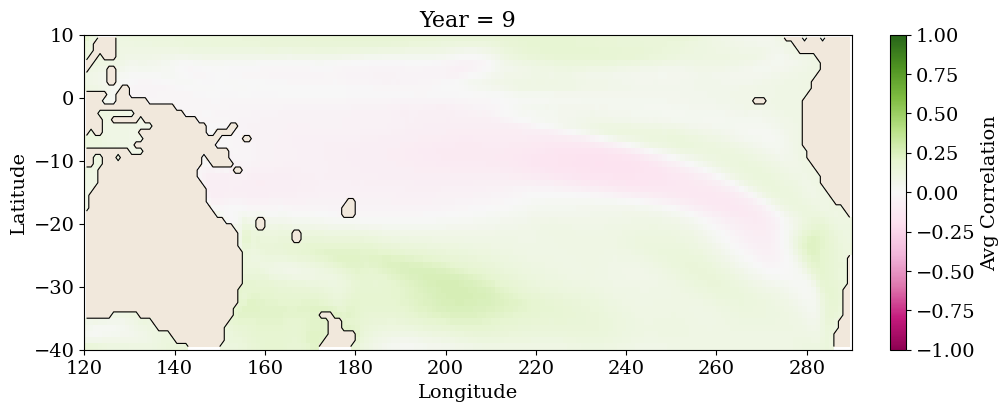

In [26]:
# Font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']

# Load data into memory
two00m = two00m.load()

# Define the lags to analyze
lags = range(9, 10)  # Just lag 9

# Create a larger figure
fig, axes = plt.subplots(len(lags), 1, figsize=(10, 4 * len(lags)), constrained_layout=True)

# Ensure axes is iterable for single-lag cases
if len(lags) == 1:
    axes = [axes]

for i, lag in enumerate(lags):
    ax = axes[i]

    # Select correlation values for this lag
    lag_corr = two00m.sel(lag=lag)

    # Compute t-statistic
    n_runs = 16
    df = n_runs - 1
    t_stat = lag_corr * np.sqrt(df) / np.sqrt(1 - lag_corr**2)

    # Compute p-values
    p_values = xr.apply_ufunc(
        stats.t.sf, np.abs(t_stat), df,
        kwargs={"loc": 0, "scale": 1}
    ) * 2

    significance_mask = p_values < 0.05

    # Plot correlation coefficients
    corr_plot = lag_corr["thetao"].plot(
        cbar_kwargs={'label': 'Avg Correlation'},
        vmin=-1.0, vmax=1.0,
        cmap="PiYG",
        ax=ax
    )

    # Add landmask (continents)
    land_mask = np.isnan(lag_corr["thetao"])
    land_mask.plot.contourf(
        ax=ax,
        levels=[0.5, 1],
        colors=["#D2B48C"],
        alpha=0.3,
        add_colorbar=False,
        zorder=0
    )
    land_mask.plot.contour(
        ax=ax,
        levels=[0.5],
        colors="black",
        linewidths=0.8,
        zorder=1
    )

    # Overlay significance hatching
    significance_mask["thetao"].where(significance_mask["thetao"]).plot.contourf(
        levels=[-1, 1],
        colors="none",
        hatches=["////"],
        add_colorbar=False,
        ax=ax,
        zorder=2
    )

    # Customize labels and ticks
    ax.set_title(f"Year = {lag}", fontsize=16)
    ax.set_xlabel("Longitude", fontsize=14)
    ax.set_ylabel("Latitude", fontsize=14)
    ax.tick_params(labelsize=14)

    # Adjust colorbar
    colorbar = corr_plot.colorbar
    colorbar.ax.yaxis.label.set_size(14)
    colorbar.ax.tick_params(labelsize=14)

# Show and save figure
plt.show()
fig.savefig('EC_corr_lag_9_200m_with_continents.png', dpi=300, bbox_inches='tight')
